In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [4]:
df = pd.read_excel('../data/raw/price_history_VALE.xlsx')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(6265, 7)

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
578,2002-03-21,2.250000,2.250000,2.250000,2.250000,0.812747,0.0
579,2002-03-22,2.229167,2.229167,2.160833,2.179167,0.787161,44247600.0
580,2002-03-25,2.170833,2.187500,2.166667,2.179167,0.787161,7429200.0
581,2002-03-26,2.179167,2.237500,2.179167,2.236667,0.807931,4604400.0
582,2002-03-27,2.245833,2.312500,2.233333,2.270833,0.820273,13928400.0


In [13]:
df['Average'] = (df['Open'] + df['Close']) / 2

,Date,Open,High,Low,Close,Adj Close,Volume,Average
578,2002-03-21,2.250000,2.250000,2.250000,2.250000,0.812747,0.0,2.250000
579,2002-03-22,2.229167,2.229167,2.160833,2.179167,0.787161,44247600.0,2.195000
580,2002-03-25,2.170833,2.187500,2.166667,2.179167,0.787161,7429200.0,2.168750
581,2002-03-26,2.179167,2.237500,2.179167,2.236667,0.807931,4604400.0,2.179167
582,2002-03-27,2.245833,2.312500,2.233333,2.270833,0.820273,13928400.0,2.239583


In [14]:
df.set_index('Date', inplace=True)

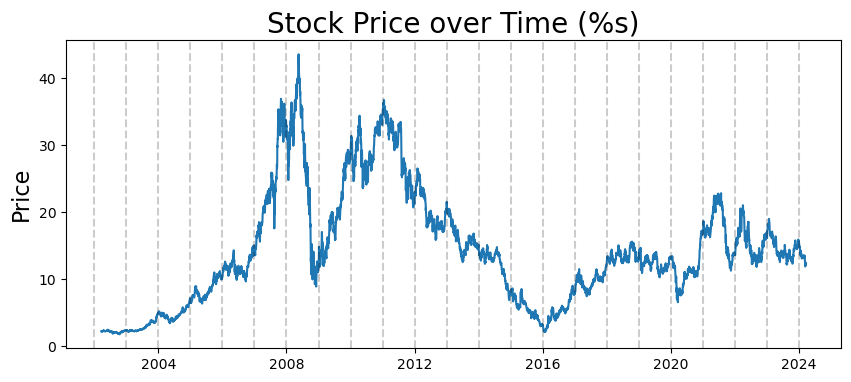

In [37]:
plt.figure(figsize=(10,4))
plt.plot(df.Average)
plt.title('Stock Price over Time (%s)', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2002,2025):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [28]:
#take first difference
first_diffs = df.Average.values[1:] - df.Average.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [29]:
#set first difference as variable in dataframe
df['FirstDifference'] = first_diffs

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Average,FirstDifference
Date,,,,,,,,
2002-03-21,2.250000,2.250000,2.250000,2.250000,0.812747,0.0,2.250000,-5.500007e-02
2002-03-22,2.229167,2.229167,2.160833,2.179167,0.787161,44247600.0,2.195000,-2.624989e-02
2002-03-25,2.170833,2.187500,2.166667,2.179167,0.787161,7429200.0,2.168750,1.041698e-02
2002-03-26,2.179167,2.237500,2.179167,2.236667,0.807931,4604400.0,2.179167,6.041598e-02
2002-03-27,2.245833,2.312500,2.233333,2.270833,0.820273,13928400.0,2.239583,4.768372e-07


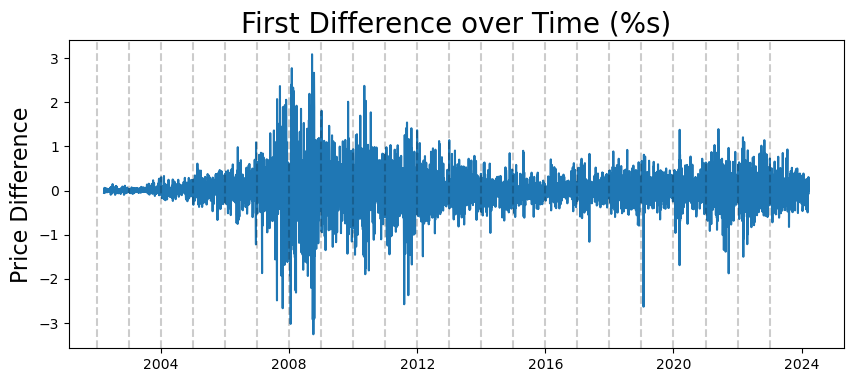

In [32]:
plt.figure(figsize=(10,4))
plt.plot(df.FirstDifference)
plt.title('First Difference over Time (%s)', fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2002,2024):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

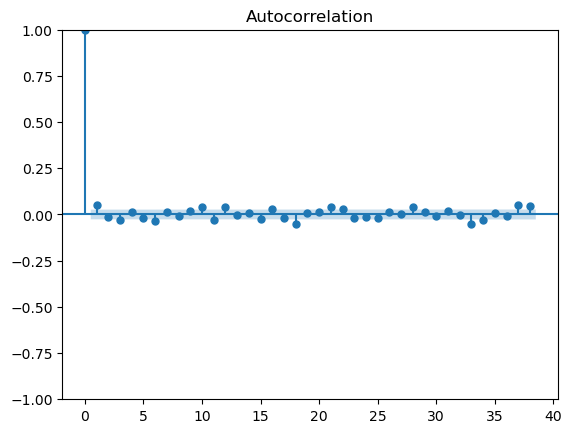

In [33]:
acf_plot = plot_acf(df.FirstDifference)

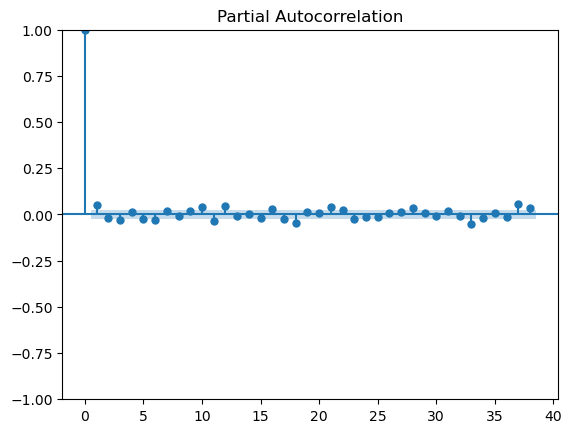

In [34]:
pacf_plot = plot_pacf(df.FirstDifference)

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [40]:
perform_adf_test(df.Average) #fodeu

ADF Statistic: -2.219646
p-value: 0.199193
